# Rosenbrock pdf

This function has a pdf of the form,

$$\begin{equation}
p(x, y) \propto - \left( (a - x)^2 + b (y - x^2)^2) \right),
\end{equation}$$

where by default $a = 1$ and $b = 100$. We now plot this function.

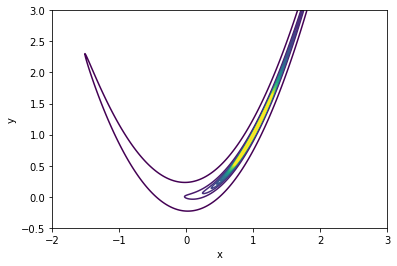

In [5]:
import sys
import os
cwd = os.getcwd()
sys.path.append('C://Users//bclamber//Documents//GitHub//pints')
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Import toy Rosebrock pdf
log_pdf = toy.RosenbrockLogPDF()

# Contour plot of pdf
levels = np.linspace(-3,12,20)
x = np.linspace(-2,3,1000)
y = np.linspace(-0.5,3,1000)
X, Y = np.meshgrid(x, y)
Z = np.exp(log_pdf([X,Y]))
plt.contour(X, Y, Z, levels = levels)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Using adaptive covariance MCMC to sample from this (un-normalised) pdf.

In [6]:
# Create an adaptive covariance MCMC routine
x0 = np.random.rand(2)
mcmc = pints.AdaptiveCovarianceMCMC(log_pdf, x0)

# Aim for an acceptance rate of 0.3
mcmc.set_acceptance_rate(0.3)

# Use 4000 iterations in total
mcmc.set_iterations(8000)

# Start adapting after 1000 iterations
mcmc.set_non_adaptive_iterations(1000)

# Discard the first 2000 iterations as burn in
mcmc.set_burn_in(2000)

# Store only every 4th sample
mcmc.set_thinning_rate(4)

# Disable verbose mode
mcmc.set_verbose(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = []
for i in range(0,num_chains):
    chain = mcmc.run()
    chains.append(chain)
print('Done!')

Running...
Done!


Scatter plot of the samples.

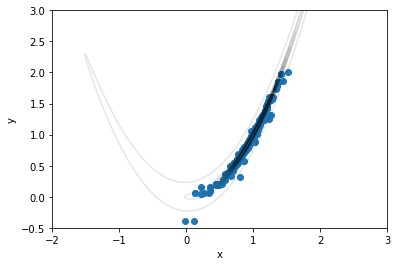

In [17]:
stacked = np.vstack(chains)
plt.contour(X, Y, Z, levels = levels, colors = 'k', alpha = 0.1)
plt.scatter(stacked[:,0], stacked[:,1])
plt.xlim(-2, 3)
plt.ylim(-0.5, 3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Bimodal multivariate Gaussian
This function has a pdf of the form,


$$ p(\boldsymbol{x}) \propto \mathcal{N}\left(\boldsymbol{x}\;\lvert\;\boldsymbol{\mu}_1, \boldsymbol{\Sigma}_1\right) + \mathcal{N}\left(\boldsymbol{x}\;\lvert\;\boldsymbol{\mu}_2, \boldsymbol{\Sigma}_2\right),$$

where, by default, $\boldsymbol{\mu}_1 = (0,0)$ and $\boldsymbol{\mu}_2 = (10,10)$ and $\boldsymbol{\Sigma}_1$ and $\boldsymbol{\Sigma}_2$ are diagonal correlation matrices. Plotting this pdf,

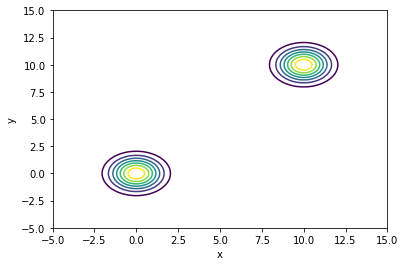

In [31]:
# Import toy Rosebrock pdf
log_pdf = toy.BimodalMultivariateGaussianLogPDF()

# Contour plot of pdf
levels = np.linspace(-3,12,20)
num_points = 100
x = np.linspace(-5,15,num_points)
y = np.linspace(-5,15,num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(0, num_points):
    for j in range(0, num_points):
        Z[i, j] = np.exp(log_pdf([X[i, j], Y[i, j]]))
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Using adaptive covariance MCMC to sample from this (un-normalised) pdf.

In [34]:
# Create an adaptive covariance MCMC routine
x0 = np.random.rand(2) + 4.5
mcmc = pints.AdaptiveCovarianceMCMC(log_pdf, x0)

# Aim for an acceptance rate of 0.3
mcmc.set_acceptance_rate(0.3)

# Use 4000 iterations in total
mcmc.set_iterations(8000)

# Start adapting after 1000 iterations
mcmc.set_non_adaptive_iterations(1000)

# Discard the first 2000 iterations as burn in
mcmc.set_burn_in(2000)

# Store only every 4th sample
mcmc.set_thinning_rate(4)

# Disable verbose mode
mcmc.set_verbose(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = []
for i in range(0,num_chains):
    chain = mcmc.run()
    chains.append(chain)
print('Done!')

Running...
Done!


Scatter plot of the samples. Adaptive covariance MCMC does ok if we start the chains between the modes.

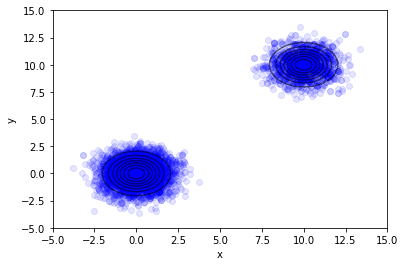

In [46]:
stacked = np.vstack(chains)
plt.contour(X, Y, Z, colors = 'k', alpha = 0.5)
plt.scatter(stacked[:,0], stacked[:,1], c = 'b', alpha = 0.1)
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

But if we start the chains at one of the modes, it fails to find the other.

Running...
Done!


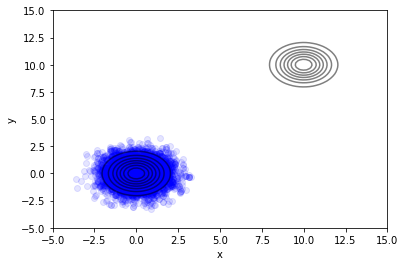

In [47]:
# Create an adaptive covariance MCMC routine
x0 = np.random.rand(2)
mcmc = pints.AdaptiveCovarianceMCMC(log_pdf, x0)

# Aim for an acceptance rate of 0.3
mcmc.set_acceptance_rate(0.3)

# Use 4000 iterations in total
mcmc.set_iterations(8000)

# Start adapting after 1000 iterations
mcmc.set_non_adaptive_iterations(1000)

# Discard the first 2000 iterations as burn in
mcmc.set_burn_in(2000)

# Store only every 4th sample
mcmc.set_thinning_rate(4)

# Disable verbose mode
mcmc.set_verbose(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = []
for i in range(0,num_chains):
    chain = mcmc.run()
    chains.append(chain)
print('Done!')

stacked = np.vstack(chains)
plt.contour(X, Y, Z, colors = 'k', alpha = 0.5)
plt.scatter(stacked[:,0], stacked[:,1], c = 'b', alpha = 0.1)
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()